In [375]:
from sklearn import preprocessing
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, BaggingClassifier, VotingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.linear_model import LogisticRegression, SGDOneClassSVM, Perceptron
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import sys
import sklearn.svm as svm
import numpy as np
import pandas as pd
from Helpers import encode_labels
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
training=pd.read_csv("train_final_1.csv")                                                     ##Reading the data
testing=pd.read_csv("test_final_1.csv")

In [ ]:
training = encode_labels(training)
testing = encode_labels(testing)

# Model 1: Decision Trees

In [387]:
param_grid = {
        'max_depth': range(10, 50, 2),
        'min_impurity_decrease': [0.0, 0.01, 0.1, 0.2, 0.001]
    }
dt = tree.DecisionTreeClassifier(criterion='gini', random_state=42, max_features='auto')


In [388]:
clf_dt = RandomizedSearchCV(estimator=dt,param_distributions=param_grid,cv=5,n_iter=100,verbose=2,random_state=42,n_jobs=-1)
clf_dt.fit(training.drop(['income>50K'],axis=1),training['income>50K'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END ...........max_depth=10, min_impurity_decrease=0.01; total time=   0.0s
[CV] END ...........max_depth=10, min_impurity_decrease=0.01; total time=   0.0s
[CV] END ...........max_depth=10, min_impurity_decrease=0.01; total time=   0.0s
[CV] END ............max_depth=10, min_impurity_decrease=0.0; total time=   0.0s
[CV] END ............max_depth=10, min_impurity_decrease=0.0; total time=   0.0s
[CV] END ............max_depth=10, min_impurity_decrease=0.0; total time=   0.0s
[CV] END ............max_depth=10, min_impurity_decrease=0.0; total time=   0.1s
[CV] END ............max_depth=10, min_impurity_decrease=0.0; total time=   0.1s
[CV] END ...........max_depth=10, min_impurity_decrease=0.01; total time=   0.0s
[CV] END ...........max_depth=10, min_impurity_decrease=0.01; total time=   0.0s
[CV] END ............max_depth=10, min_impurity_decrease=0.1; total time=   0.0s
[CV] END ............max_depth=10, min_impurit

RandomizedSearchCV(cv=5,
                   estimator=DecisionTreeClassifier(max_features='auto',
                                                    random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(10, 50, 2),
                                        'min_impurity_decrease': [0.0, 0.01,
                                                                  0.1, 0.2,
                                                                  0.001]},
                   random_state=42, verbose=2)

In [389]:
clf_dt.best_estimator_

DecisionTreeClassifier(max_depth=12, max_features='auto', random_state=42)

In [390]:
clf_dt.cv_results_['mean_test_score']

array([0.84096, 0.81432, 0.75936, 0.75936, 0.8266 , 0.84408, 0.81432,
       0.75936, 0.75936, 0.8266 , 0.83932, 0.81432, 0.75936, 0.75936,
       0.8266 , 0.83492, 0.81432, 0.75936, 0.75936, 0.8266 , 0.82624,
       0.81432, 0.75936, 0.75936, 0.8266 , 0.82824, 0.81432, 0.75936,
       0.75936, 0.8266 , 0.81824, 0.81432, 0.75936, 0.75936, 0.8266 ,
       0.81884, 0.81432, 0.75936, 0.75936, 0.8266 , 0.81444, 0.81432,
       0.75936, 0.75936, 0.8266 , 0.81088, 0.81432, 0.75936, 0.75936,
       0.8266 , 0.80832, 0.81432, 0.75936, 0.75936, 0.8266 , 0.80892,
       0.81432, 0.75936, 0.75936, 0.8266 , 0.8094 , 0.81432, 0.75936,
       0.75936, 0.8266 , 0.80864, 0.81432, 0.75936, 0.75936, 0.8266 ,
       0.80656, 0.81432, 0.75936, 0.75936, 0.8266 , 0.80712, 0.81432,
       0.75936, 0.75936, 0.8266 , 0.80876, 0.81432, 0.75936, 0.75936,
       0.8266 , 0.80844, 0.81432, 0.75936, 0.75936, 0.8266 , 0.80652,
       0.81432, 0.75936, 0.75936, 0.8266 , 0.80648, 0.81432, 0.75936,
       0.75936, 0.82

In [392]:
probs= clf_dt.predict_proba(testing.drop(['ID'],axis=1))
ID=[]
for i in range(23842):
    ID.append(i+1)
d={'ID':ID,"Prediction":probs[:,1]}                                                            
df=pd.DataFrame(d)
df.to_csv("Submission_dt.csv",index=False)

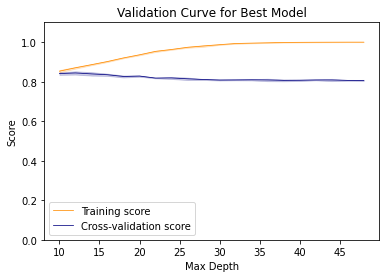

In [397]:
# Get Validation Curves for the Best Model
best_model = clf_dt
fig_name = 'output-dt.png'
train_scores, test_scores = validation_curve(clf_dt.best_estimator_, training.drop(['income>50K'],axis=1),training['income>50K'],cv=5, param_name='max_depth',
                                            param_range=param_grid['max_depth'], scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for Best Model")
plt.xlabel('Max Depth')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 0.75
plt.plot(
    param_grid['max_depth'], train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_grid['max_depth'],
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_grid['max_depth'], test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_grid['max_depth'],
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.savefig(f'Figures/{fig_name}', dpi=200)
plt.show()

# Model 2: Logistic Regression

In [457]:
param_grid = {
        'C': [0.1, 0.5, 1, 2, 3, 4, 5],
    }
lr=LogisticRegression(random_state=42, max_iter=10000, solver='saga')


In [407]:
clf_lr=RandomizedSearchCV(estimator=lr,param_distributions=param_grid,cv=5,verbose=2,random_state=0,n_jobs=-1)
clf_lr.fit(training.drop(['income>50K'],axis=1),training['income>50K'])

/home/sci/nawazish.khan/miniconda3/envs/assignment/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV] END ..............................................C=0.1; total time=  32.5s
[CV] END ..............................................C=0.1; total time=  32.5s
[CV] END ..............................................C=0.1; total time=  32.5s
[CV] END ..............................................C=0.5; total time=  32.7s
[CV] END ..............................................C=0.5; total time=  32.8s
[CV] END ..............................................C=0.1; total time=  33.4s
[CV] END ..............................................C=0.1; total time=  33.4s
[CV] END ..............................................C=0.5; total time=  33.9s
[CV] END ..............................................C=0.5; total time=  32.5s
[CV] END ................................................C=1; total time=  32.6s
[CV] END ................................................C=1; total time=  33.0s
[CV] END ........................................

RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(max_iter=10000, random_state=42,
                                                solver='saga'),
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 0.5, 1, 2, 3, 4, 5]},
                   random_state=0, verbose=2)

In [458]:
clf_lr.best_estimator_

LogisticRegression(C=0.1, max_iter=10000, random_state=42, solver='saga')

In [437]:
clf_lr.cv_results_['mean_test_score']

array([0.79576, 0.79576, 0.79576, 0.79576, 0.79576, 0.79576, 0.79576])

In [459]:
# Get Validation Curves for the Best Model
best_model = clf_lr
fig_name = 'output-gnb.png'
varying_param = 'C'
train_scores, test_scores = validation_curve(best_model.best_estimator_, training.drop(['income>50K'],axis=1),training['income>50K'],cv=5, 
                                            param_name=varying_param, param_range=param_grid[varying_param], scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


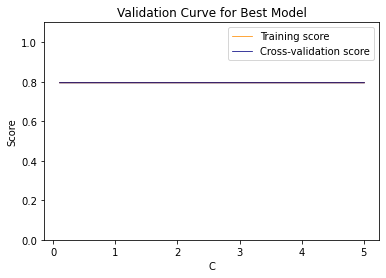

In [460]:

plt.title("Validation Curve for Best Model")
plt.xlabel('C')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 0.75
plt.plot(
    param_grid[varying_param], train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_grid[varying_param], test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.savefig(f'Figures/{fig_name}', dpi=200)
plt.show()

In [417]:
probs= clf_lr.predict_proba(testing.drop(['ID'],axis=1))
ID=[]
for i in range(23842):
    ID.append(i+1)
d={'ID':ID,"Prediction":probs[:,1]}                                                            
df=pd.DataFrame(d)
df.to_csv("Submission_lr.csv",index=False)

# 3. Gaussian Naive Baye's

In [442]:
param_grid = {
        'var_smoothing': [1e-10, 1e-9, 1e-8, 1e-7, 1e-6],
    }
gnb = GaussianNB()

clf_gnb=RandomizedSearchCV(estimator=gnb,param_distributions=param_grid,cv=5,verbose=2,random_state=0,n_jobs=-1)
clf_gnb.fit(training.drop(['income>50K'],axis=1),training['income>50K'])

/home/sci/nawazish.khan/miniconda3/envs/assignment/lib/python3.7/site-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-10; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-08; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoothing=1e-09; total time=   0.0s
[CV] END ................................var_smoo

RandomizedSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
                   param_distributions={'var_smoothing': [1e-10, 1e-09, 1e-08,
                                                          1e-07, 1e-06]},
                   random_state=0, verbose=2)

In [443]:
clf_gnb.best_estimator_

GaussianNB(var_smoothing=1e-10)

In [444]:
clf_gnb.cv_results_['mean_test_score']

array([0.79692, 0.79592, 0.79556, 0.79532, 0.79568])

In [445]:
probs= clf_gnb.predict_proba(testing.drop(['ID'],axis=1))
ID=[]
for i in range(23842):
    ID.append(i+1)
d={'ID':ID,"Prediction":probs[:,1]}                                                            
df=pd.DataFrame(d)
df.to_csv("Submission_gnb.csv",index=False)

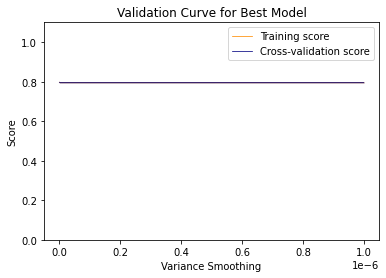

In [448]:
# Get Validation Curves for the Best Model
best_model = clf_gnb
fig_name = 'output-gnb.png'
varying_param = 'var_smoothing'
train_scores, test_scores = validation_curve(best_model.best_estimator_, training.drop(['income>50K'],axis=1),training['income>50K'],cv=5, 
                                            param_name=varying_param, param_range=param_grid[varying_param], scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for Best Model")
plt.xlabel('Variance Smoothing')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 0.75
plt.plot(
    param_grid[varying_param], train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_grid[varying_param], test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.savefig(f'Figures/{fig_name}', dpi=200)
plt.show()

# 4. Model  : Random Forest

In [398]:
param_grid = {
        'n_estimators': range(100, 200, 2),
        'max_depth': range(10, 50, 2),
    }
rf=RandomForestClassifier(random_state=42)


In [399]:
clf=RandomizedSearchCV(estimator=rf,param_distributions=param_grid,cv=5,n_iter=100,verbose=2,random_state=42,n_jobs=-1)
clf.fit(training.drop(['income>50K'],axis=1),training['income>50K'])

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END .....................max_depth=30, n_estimators=142; total time=   3.5s
[CV] END .....................max_depth=30, n_estimators=142; total time=   3.7s
[CV] END .....................max_depth=30, n_estimators=142; total time=   3.7s
[CV] END .....................max_depth=30, n_estimators=142; total time=   3.8s
[CV] END .....................max_depth=30, n_estimators=142; total time=   3.8s
[CV] END .....................max_depth=38, n_estimators=174; total time=   4.3s
[CV] END .....................max_depth=38, n_estimators=174; total time=   4.4s
[CV] END .....................max_depth=38, n_estimators=174; total time=   5.0s
[CV] END .....................max_depth=38, n_estimators=174; total time=   4.4s
[CV] END .....................max_depth=38, n_estimators=174; total time=   4.4s
[CV] END .....................max_depth=36, n_estimators=120; total time=   3.3s
[CV] END .....................max_depth=38, n_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': range(10, 50, 2),
                                        'n_estimators': range(100, 200, 2)},
                   random_state=42, verbose=2)

In [400]:
clf.best_estimator_

RandomForestClassifier(max_depth=16, n_estimators=196, random_state=42)

In [401]:
clf.cv_results_['mean_test_score']

array([0.86068, 0.86056, 0.86104, 0.85964, 0.86164, 0.85948, 0.86024,
       0.86016, 0.85992, 0.86552, 0.8594 , 0.86324, 0.86016, 0.85916,
       0.85928, 0.85952, 0.86464, 0.85932, 0.85964, 0.86424, 0.86096,
       0.8662 , 0.86284, 0.86104, 0.86488, 0.86568, 0.86544, 0.85944,
       0.85932, 0.85932, 0.86464, 0.86568, 0.86016, 0.86088, 0.86252,
       0.86624, 0.8598 , 0.86016, 0.85932, 0.86356, 0.8642 , 0.86368,
       0.86392, 0.859  , 0.86492, 0.86448, 0.85856, 0.8596 , 0.862  ,
       0.85928, 0.8594 , 0.85956, 0.86412, 0.85956, 0.86028, 0.85976,
       0.8598 , 0.85992, 0.86536, 0.85884, 0.86488, 0.8634 , 0.8612 ,
       0.86468, 0.85996, 0.8602 , 0.8596 , 0.85932, 0.86348, 0.86144,
       0.8656 , 0.86152, 0.85992, 0.86068, 0.86484, 0.86472, 0.85848,
       0.85992, 0.86008, 0.86376, 0.85968, 0.86368, 0.86508, 0.8636 ,
       0.864  , 0.8612 , 0.85928, 0.8602 , 0.85912, 0.86416, 0.86336,
       0.86056, 0.86116, 0.86496, 0.85924, 0.86196, 0.85852, 0.86332,
       0.8634 , 0.85

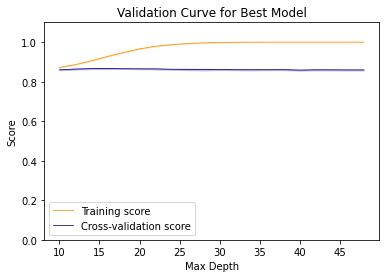

In [402]:
# Get Validation Curves for the Best Model
best_model = clf
fig_name = 'output-rf.png'
train_scores, test_scores = validation_curve(best_model.best_estimator_, training.drop(['income>50K'],axis=1),training['income>50K'],cv=5, param_name='max_depth',
                                            param_range=param_grid['max_depth'], scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for Best Model")
plt.xlabel('Max Depth')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 0.75
plt.plot(
    param_grid['max_depth'], train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_grid['max_depth'],
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_grid['max_depth'], test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_grid['max_depth'],
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.savefig(f'Figures/{fig_name}', dpi=200)
plt.show()

In [405]:
probs= clf.predict_proba(testing.drop(['ID'],axis=1))
ID=[]
for i in range(23842):
    ID.append(i+1)
d={'ID':ID,"Prediction":probs[:,1]}                                                            
df=pd.DataFrame(d)
df.to_csv("Submission_rf.csv",index=False)

# 5. AdaBoost

In [461]:
aboost = AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(max_depth=2), random_state=42)
param_grid = {
        'n_estimators': range(100, 300, 2),
        'learning_rate': [0.01, 0.1, 0.5, 1, 3]
    }

In [450]:
clf_aboost=RandomizedSearchCV(estimator=aboost,param_distributions=param_grid,cv=5,verbose=2,random_state=42,n_jobs=-1)
clf_aboost.fit(training.drop(['income>50K'],axis=1),training['income>50K'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..................learning_rate=1, n_estimators=222; total time=   5.6s
[CV] END ..................learning_rate=1, n_estimators=222; total time=   5.7s
[CV] END ..................learning_rate=1, n_estimators=222; total time=   5.9s
[CV] END ...............learning_rate=0.01, n_estimators=246; total time=   6.4s
[CV] END ..................learning_rate=1, n_estimators=222; total time=   6.4s
[CV] END ...............learning_rate=0.01, n_estimators=246; total time=   6.6s
[CV] END ..................learning_rate=1, n_estimators=222; total time=   6.6s
[CV] END ...............learning_rate=0.01, n_estimators=246; total time=   7.3s
[CV] END ...............learning_rate=0.01, n_estimators=246; total time=   6.3s
[CV] END ...............learning_rate=0.01, n_estimators=246; total time=   6.6s
[CV] END ..................learning_rate=1, n_estimators=248; total time=   5.9s
[CV] END ..................learning_rate=1, n_es

RandomizedSearchCV(cv=5,
                   estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                random_state=42),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5, 1, 3],
                                        'n_estimators': range(100, 300, 2)},
                   random_state=42, verbose=2)

In [451]:
clf_aboost.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.1, n_estimators=210, random_state=42)

In [452]:
clf_aboost.cv_results_['mean_test_score']

array([0.86688, 0.84512, 0.86696, 0.87084, 0.86152, 0.86508, 0.86672,
       0.86656, 0.84368, 0.34784])

In [453]:
clf_aboost.cv_results_['std_test_score']

array([0.00437557, 0.00460712, 0.00458764, 0.0033476 , 0.00321148,
       0.00531654, 0.00497128, 0.003102  , 0.00434622, 0.21312109])

In [454]:
probs= clf_aboost.predict_proba(testing.drop(['ID'],axis=1))
ID=[]
for i in range(23842):
    ID.append(i+1)
d={'ID':ID,"Prediction":probs[:,1]}                                                            
df=pd.DataFrame(d)
df.to_csv("Submission_aboost.csv",index=False)

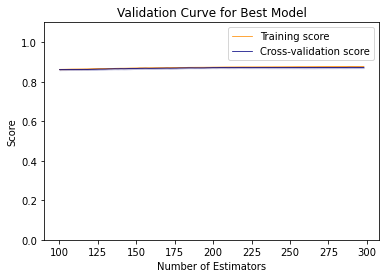

In [462]:
# Get Validation Curves for the Best Model
best_model = clf_aboost
fig_name = 'output-aboost.png'
varying_param = 'n_estimators'
train_scores, test_scores = validation_curve(best_model.best_estimator_, training.drop(['income>50K'],axis=1),training['income>50K'],cv=5, 
                                            param_name=varying_param, param_range=param_grid[varying_param], scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for Best Model")
plt.xlabel('Number of Estimators')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 0.75
plt.plot(
    param_grid[varying_param], train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_grid[varying_param], test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.savefig(f'Figures/{fig_name}', dpi=200)
plt.show()

# 6. Bagging Classifiers

In [481]:
bagged = BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(max_depth=10), random_state=42)
param_grid = {
        'n_estimators': range(100, 300, 2),
        'max_features': [2,3,4,5,6,7,8,9,10,11,12,13,14],
        'max_samples': [1.0, 0.5, 0.25, 0.75],

    }

In [482]:
clf_bagged=RandomizedSearchCV(estimator=bagged,param_distributions=param_grid,cv=5,verbose=2,random_state=42,n_jobs=-1)
clf_bagged.fit(training.drop(['income>50K'],axis=1),training['income>50K'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ..max_features=4, max_samples=1.0, n_estimators=220; total time=   4.0s
[CV] END ..max_features=4, max_samples=1.0, n_estimators=220; total time=   4.2s
[CV] END ..max_features=4, max_samples=1.0, n_estimators=220; total time=   4.4s
[CV] END ..max_features=4, max_samples=1.0, n_estimators=220; total time=   4.4s
[CV] END ..max_features=4, max_samples=1.0, n_estimators=220; total time=   4.6s
[CV] END .max_features=11, max_samples=0.5, n_estimators=244; total time=   6.9s
[CV] END .max_features=11, max_samples=0.5, n_estimators=244; total time=   7.5s
[CV] END .max_features=11, max_samples=0.5, n_estimators=244; total time=   7.5s
[CV] END max_features=14, max_samples=0.75, n_estimators=282; total time=  13.6s
[CV] END max_features=14, max_samples=0.75, n_estimators=282; total time=  13.6s
[CV] END max_features=14, max_samples=0.75, n_estimators=282; total time=  14.0s
[CV] END .max_features=9, max_samples=0.25, n_es

RandomizedSearchCV(cv=5,
                   estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                                               random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_features': [2, 3, 4, 5, 6, 7, 8, 9,
                                                         10, 11, 12, 13, 14],
                                        'max_samples': [1.0, 0.5, 0.25, 0.75],
                                        'n_estimators': range(100, 300, 2)},
                   random_state=42, verbose=2)

In [483]:
clf_bagged.best_estimator_

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_features=13, n_estimators=152, random_state=42)

In [484]:
clf_bagged.cv_results_['mean_test_score']

array([0.84208, 0.86376, 0.86364, 0.86276, 0.8198 , 0.86432, 0.86304,
       0.8634 , 0.86336, 0.79096])

In [467]:
probs= clf_bagged.predict_proba(testing.drop(['ID'],axis=1))
ID=[]
for i in range(23842):
    ID.append(i+1)
d={'ID':ID,"Prediction":probs[:,1]}                                                            
df=pd.DataFrame(d)
df.to_csv("Submission_bagged.csv",index=False)

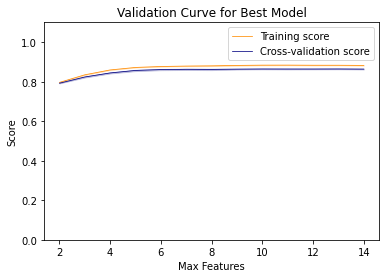

In [470]:
# Get Validation Curves for the Best Model
best_model = clf_bagged
fig_name = 'output-bagged.png'
varying_param = 'max_features'
train_scores, test_scores = validation_curve(best_model.best_estimator_, training.drop(['income>50K'],axis=1),training['income>50K'],cv=5, 
                                            param_name=varying_param, param_range=param_grid[varying_param], scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for Best Model")
plt.xlabel('Max Features')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 0.75
plt.plot(
    param_grid[varying_param], train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_grid[varying_param], test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.savefig(f'Figures/{fig_name}', dpi=200)
plt.show()

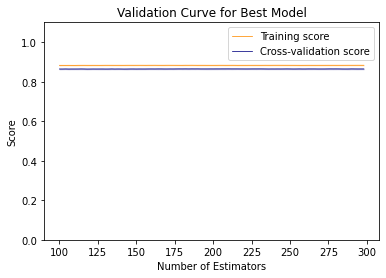

In [472]:
# Get Validation Curves for the Best Model
best_model = clf_bagged
fig_name = 'output-bagged-2.png'
varying_param = 'n_estimators'
train_scores, test_scores = validation_curve(best_model.best_estimator_, training.drop(['income>50K'],axis=1),training['income>50K'],cv=5, 
                                            param_name=varying_param, param_range=param_grid[varying_param], scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for Best Model")
plt.xlabel('Number of Estimators')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 0.75
plt.plot(
    param_grid[varying_param], train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_grid[varying_param], test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.savefig(f'Figures/{fig_name}', dpi=200)
plt.show()

# 5. SVM

In [473]:
svm_classif = svm.SVC(random_state=42, gamma='scale', probability=True, max_iter=-1)
param_grid = {
        'C': [0.5, 1.0, 1.5, 1.25, 0.25, 0.75, 1.75, 2.0],
        'kernel': ['rbf', 'sigmoid'],
        'degree': [3, 5, 7],
    }


In [382]:
clf_svm=GridSearchCV(estimator=svm_classif,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
clf_svm.fit(training.drop(['income>50K'],axis=1),training['income>50K'])

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END ........................C=0.5, degree=3, kernel=rbf; total time= 3.2min
[CV] END ........................C=0.5, degree=3, kernel=rbf; total time= 3.2min
[CV] END ........................C=0.5, degree=3, kernel=rbf; total time= 3.2min
[CV] END ........................C=0.5, degree=3, kernel=rbf; total time= 3.2min
[CV] END ........................C=0.5, degree=3, kernel=rbf; total time= 3.2min
[CV] END ....................C=0.5, degree=3, kernel=sigmoid; total time= 3.2min
[CV] END ....................C=0.5, degree=3, kernel=sigmoid; total time= 3.2min
[CV] END ....................C=0.5, degree=3, kernel=sigmoid; total time= 3.3min
[CV] END ........................C=0.5, degree=5, kernel=rbf; total time= 3.1min
[CV] END ........................C=0.5, degree=5, kernel=rbf; total time= 3.2min
[CV] END ........................C=0.5, degree=5, kernel=rbf; total time= 3.1min
[CV] END ....................C=0.5, degree=3, k

GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42), n_jobs=-1,
             param_grid={'C': [0.5, 1.0, 1.5, 1.25, 0.25, 0.75, 1.75, 2.0],
                         'degree': [3, 5, 7], 'kernel': ['rbf', 'sigmoid']},
             verbose=2)

In [383]:
clf_svm.best_estimator_

SVC(C=2.0, probability=True, random_state=42)

In [386]:

(clf_svm.cv_results_['mean_test_score'])

array([0.78176, 0.64496, 0.78176, 0.64496, 0.78176, 0.64496, 0.79364,
       0.64344, 0.79364, 0.64344, 0.79364, 0.64344, 0.79704, 0.64272,
       0.79704, 0.64272, 0.79704, 0.64272, 0.7958 , 0.64308, 0.7958 ,
       0.64308, 0.7958 , 0.64308, 0.77352, 0.64852, 0.77352, 0.64852,
       0.77352, 0.64852, 0.788  , 0.644  , 0.788  , 0.644  , 0.788  ,
       0.644  , 0.798  , 0.64264, 0.798  , 0.64264, 0.798  , 0.64264,
       0.7988 , 0.6426 , 0.7988 , 0.6426 , 0.7988 , 0.6426 ])

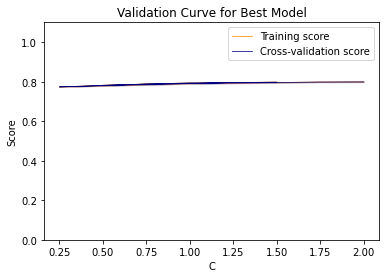

In [474]:
# Get Validation Curves for the Best Model
best_model = clf_svm
fig_name = 'output-svm.png'
varying_param = 'C'
train_scores, test_scores = validation_curve(best_model.best_estimator_, training.drop(['income>50K'],axis=1),training['income>50K'],cv=5, 
                                            param_name=varying_param, param_range=param_grid[varying_param], scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for Best Model")
plt.xlabel('C')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 0.75
plt.plot(
    param_grid[varying_param], train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_grid[varying_param], test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.savefig(f'Figures/{fig_name}', dpi=200)
plt.show()

In [476]:
probs= clf_svm.predict_proba(testing.drop(['ID'],axis=1))
ID=[]
for i in range(23842):
    ID.append(i+1)
d={'ID':ID,"Prediction":probs[:,1]}                                                            
df=pd.DataFrame(d)
df.to_csv("Submission_svm.csv",index=False)

# 7. Voting CLassifiers

In [327]:
param_grid = {
        'estimators': [[('aboost', AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2),n_estimators=100, random_state=42)),
        ('rf', RandomForestClassifier(max_depth=16, n_estimators=148, random_state=42)),
        ('bagged', BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=10),
                  max_features=13, n_estimators=152, random_state=42),('gnb', GaussianNB()))],
        [('aboost',AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2),n_estimators=50, random_state=42)),
        ('rf', RandomForestClassifier(max_depth=20, n_estimators=148, random_state=42)),
        ('bagged', BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2),
                  max_features=13, n_estimators=152, random_state=42))]]
    }


In [328]:
vote_class = VotingClassifier(estimators=param_grid['estimators'], voting='soft')

In [329]:
clf_vote_class=GridSearchCV(estimator=vote_class,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
clf_vote_class.fit(training.drop(['income>50K'],axis=1),training['income>50K'])

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] END estimators=[('aboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   random_state=42)), ('rf', RandomForestClassifier(max_depth=20, n_estimators=148, random_state=42)), ('bagged', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                  max_features=13, n_estimators=152, random_state=42))]; total time=   7.1s[CV] END estimators=[('aboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   random_state=42)), ('rf', RandomForestClassifier(max_depth=20, n_estimators=148, random_state=42)), ('bagged', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                  max_features=13, n_estimators=152, random_state=42))]; total time=   7.1s

[CV] END estimators=[('aboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   random_state=42)), ('rf', Ra

/home/sci/nawazish.khan/miniconda3/envs/assignment/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sci/nawazish.khan/miniconda3/envs/assignment/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sci/nawazish.khan/miniconda3/envs/assignment/lib/python3.7/site-packages/sklearn/ensemble/_voting.py", line 324, in fit
    return super().fit(X, transformed_y, sample_weight)
  File "/home/sci/nawazish.khan/miniconda3/envs/as

GridSearchCV(cv=5,
             estimator=VotingClassifier(estimators=[[('aboost',
                                                      AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                                         n_estimators=100,
                                                                         random_state=42)),
                                                     ('rf',
                                                      RandomForestClassifier(max_depth=16,
                                                                             n_estimators=148,
                                                                             random_state=42)),
                                                     ('bagged',
                                                      BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                                                                        max_fe

In [330]:
clf_vote_class.best_estimator_

VotingClassifier(estimators=[('aboost',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                 random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=20,
                                                     n_estimators=148,
                                                     random_state=42)),
                             ('bagged',
                              BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                max_features=13,
                                                n_estimators=152,
                                                random_state=42))],
                 voting='soft')

In [331]:
clf_vote_class.cv_results_['mean_test_score']

array([   nan, 0.8532])

In [333]:
probs= clf_vote_class.predict_proba(testing.drop(['ID'],axis=1))
ID=[]
for i in range(23842):
    ID.append(i+1)
d={'ID':ID,"Prediction":probs[:,1]}                                                            
df=pd.DataFrame(d)
df.to_csv("Submission_voting.csv",index=False)

# 8. Histogram Gradient Boosting Classifier

In [485]:
hist_boost = HistGradientBoostingClassifier(loss='auto', random_state=42, early_stopping=True)
param_grid = {
        'learning_rate': [0.1, 0.01, 0.5, 0.25, 0.75, 1.0],
        'max_leaf_nodes': range(3, 100, 2),
        'max_depth': range(10, 50, 2),
        'l2_regularization': [0, 0.1, 0.01, 0.5]
    }


In [486]:
clf_hist_boost=RandomizedSearchCV(estimator=hist_boost,param_distributions=param_grid,cv=5,verbose=2,random_state=42,n_jobs=-1)
clf_hist_boost.fit(training.drop(['income>50K'],axis=1),training['income>50K'])

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END l2_regularization=0.01, learning_rate=0.75, max_depth=14, max_leaf_nodes=37; total time=   0.2s
[CV] END l2_regularization=0.01, learning_rate=0.75, max_depth=14, max_leaf_nodes=37; total time=   0.2s
[CV] END l2_regularization=0.01, learning_rate=0.75, max_depth=14, max_leaf_nodes=37; total time=   0.2s
[CV] END l2_regularization=0.01, learning_rate=0.75, max_depth=14, max_leaf_nodes=37; total time=   0.3s
[CV] END l2_regularization=0.01, learning_rate=0.75, max_depth=14, max_leaf_nodes=37; total time=   0.3s
[CV] END l2_regularization=0, learning_rate=1.0, max_depth=30, max_leaf_nodes=3; total time=   0.2s
[CV] END l2_regularization=0, learning_rate=1.0, max_depth=30, max_leaf_nodes=3; total time=   0.2s
[CV] END l2_regularization=0, learning_rate=1.0, max_depth=30, max_leaf_nodes=3; total time=   0.2s
[CV] END l2_regularization=0, learning_rate=1.0, max_depth=30, max_leaf_nodes=3; total time=   0.2s
[CV] END l2_re

RandomizedSearchCV(cv=5,
                   estimator=HistGradientBoostingClassifier(early_stopping=True,
                                                            random_state=42),
                   n_jobs=-1,
                   param_distributions={'l2_regularization': [0, 0.1, 0.01,
                                                              0.5],
                                        'learning_rate': [0.1, 0.01, 0.5, 0.25,
                                                          0.75, 1.0],
                                        'max_depth': range(10, 50, 2),
                                        'max_leaf_nodes': range(3, 100, 2)},
                   random_state=42, verbose=2)

In [487]:
clf_hist_boost.best_estimator_

HistGradientBoostingClassifier(early_stopping=True, l2_regularization=0.01,
                               max_depth=18, max_leaf_nodes=19,
                               random_state=42)

In [488]:
clf_hist_boost.cv_results_['mean_test_score']

array([0.86108, 0.87196, 0.8664 , 0.86668, 0.87344, 0.85692, 0.86376,
       0.87108, 0.84444, 0.86052])

In [489]:
probs= clf_hist_boost.predict_proba(testing.drop(['ID'],axis=1))
ID=[]
for i in range(23842):
    ID.append(i+1)
d={'ID':ID,"Prediction":probs[:,1]}                                                            
df=pd.DataFrame(d)
df.to_csv("Submission_hist_boost.csv",index=False)

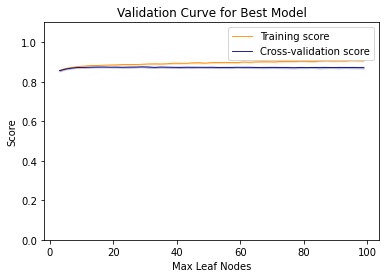

In [493]:
# Get Validation Curves for the Best Model
best_model = clf_hist_boost
fig_name = 'output-hist-grad.png'
varying_param = 'max_leaf_nodes'
train_scores, test_scores = validation_curve(best_model.best_estimator_, training.drop(['income>50K'],axis=1),training['income>50K'],cv=5, 
                                            param_name=varying_param, param_range=param_grid[varying_param], scoring='accuracy', n_jobs=-1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.title("Validation Curve for Best Model")
plt.xlabel('Max Leaf Nodes')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
lw = 0.85
plt.plot(
    param_grid[varying_param], train_scores_mean, label="Training score", color="darkorange", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.2,
    color="darkorange",
    lw=lw,
)
plt.plot(
    param_grid[varying_param], test_scores_mean, label="Cross-validation score", color="navy", lw=lw
)
plt.fill_between(
    param_grid[varying_param],
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.2,
    color="navy",
    lw=lw,
)
plt.legend(loc="best")
plt.savefig(f'Figures/{fig_name}', dpi=200)
plt.show()

# 9. Stacking Classifiers

In [369]:
param_grid = {
        'estimators': [[('aboost', AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=2),n_estimators=100, random_state=42)),
        ('rf', RandomForestClassifier(max_depth=16, n_estimators=148, random_state=42)),
        ('bagged', BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=10),
                  max_features=13, n_estimators=152, random_state=42)), ('hist_boost', HistGradientBoostingClassifier(early_stopping=True, l2_regularization=0.01,
                               max_depth=18, max_leaf_nodes=29,
                               random_state=42))],
        [('aboost',AdaBoostClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=1),n_estimators=50, random_state=42)),
        ('rf', RandomForestClassifier(max_depth=20, n_estimators=148, random_state=42)),
        ('bagged', BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(max_depth=10),
                  max_features=13, n_estimators=152, random_state=42)), ('hist_boost', HistGradientBoostingClassifier(early_stopping=True, l2_regularization=0.01,
                               max_depth=18, max_leaf_nodes=29,
                               random_state=42))]],
        'passthrough': [True, False],
        'final_estimator': [LogisticRegression(), Perceptron()]
    }

sclass = StackingClassifier(estimators=param_grid['estimators'][0], stack_method='predict_proba')


In [370]:
clf_sclass=GridSearchCV(estimator=sclass,param_grid=param_grid,cv=5,verbose=2,n_jobs=-1)
clf_sclass.fit(training.drop(['income>50K'],axis=1),training['income>50K'])

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END estimators=[('aboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100, random_state=42)), ('rf', RandomForestClassifier(max_depth=16, n_estimators=148, random_state=42)), ('bagged', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_features=13, n_estimators=152, random_state=42)), ('hist_boost', HistGradientBoostingClassifier(early_stopping=True, l2_regularization=0.01,
                               max_depth=18, max_leaf_nodes=29,
                               random_state=42))], final_estimator=LogisticRegression(), passthrough=True; total time= 1.1min


/home/sci/nawazish.khan/miniconda3/envs/assignment/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END estimators=[('aboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100, random_state=42)), ('rf', RandomForestClassifier(max_depth=16, n_estimators=148, random_state=42)), ('bagged', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_features=13, n_estimators=152, random_state=42)), ('hist_boost', HistGradientBoostingClassifier(early_stopping=True, l2_regularization=0.01,
                               max_depth=18, max_leaf_nodes=29,
                               random_state=42))], final_estimator=LogisticRegression(), passthrough=False; total time= 1.2min
[CV] END estimators=[('aboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100, random_state=42)), ('rf', RandomForestClassifier(max_depth=16, n_estimators=148, random_state=42)), ('bagged', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
  

/home/sci/nawazish.khan/miniconda3/envs/assignment/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/home/sci/nawazish.khan/miniconda3/envs/assignment/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
  

[CV] END estimators=[('aboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100, random_state=42)), ('rf', RandomForestClassifier(max_depth=16, n_estimators=148, random_state=42)), ('bagged', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_features=13, n_estimators=152, random_state=42)), ('hist_boost', HistGradientBoostingClassifier(early_stopping=True, l2_regularization=0.01,
                               max_depth=18, max_leaf_nodes=29,
                               random_state=42))], final_estimator=LogisticRegression(), passthrough=False; total time= 1.2min
[CV] END estimators=[('aboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100, random_state=42)), ('rf', RandomForestClassifier(max_depth=16, n_estimators=148, random_state=42)), ('bagged', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
  

/home/sci/nawazish.khan/miniconda3/envs/assignment/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END estimators=[('aboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)), ('rf', RandomForestClassifier(max_depth=20, n_estimators=148, random_state=42)), ('bagged', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_features=13, n_estimators=152, random_state=42)), ('hist_boost', HistGradientBoostingClassifier(early_stopping=True, l2_regularization=0.01,
                               max_depth=18, max_leaf_nodes=29,
                               random_state=42))], final_estimator=LogisticRegression(), passthrough=True; total time= 1.0min
[CV] END estimators=[('aboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)), ('rf', RandomForestClassifier(max_depth=20, n_estimators=148, random_state=42)), ('bagged', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_features=13, n_es

/home/sci/nawazish.khan/miniconda3/envs/assignment/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END estimators=[('aboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)), ('rf', RandomForestClassifier(max_depth=20, n_estimators=148, random_state=42)), ('bagged', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max_features=13, n_estimators=152, random_state=42)), ('hist_boost', HistGradientBoostingClassifier(early_stopping=True, l2_regularization=0.01,
                               max_depth=18, max_leaf_nodes=29,
                               random_state=42))], final_estimator=LogisticRegression(), passthrough=True; total time= 1.0min
[CV] END estimators=[('aboost', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   n_estimators=100, random_state=42)), ('rf', RandomForestClassifier(max_depth=16, n_estimators=148, random_state=42)), ('bagged', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                  max

GridSearchCV(cv=5,
             estimator=StackingClassifier(estimators=[('aboost',
                                                       AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                                          n_estimators=100,
                                                                          random_state=42)),
                                                      ('rf',
                                                       RandomForestClassifier(max_depth=16,
                                                                              n_estimators=148,
                                                                              random_state=42)),
                                                      ('bagged',
                                                       BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                                                                    

In [371]:
clf_sclass.best_estimator_

StackingClassifier(estimators=[('aboost',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                   n_estimators=100,
                                                   random_state=42)),
                               ('rf',
                                RandomForestClassifier(max_depth=16,
                                                       n_estimators=148,
                                                       random_state=42)),
                               ('bagged',
                                BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),
                                                  max_features=13,
                                                  n_estimators=152,
                                                  random_state=42)),
                               ('hist_boost',
                                HistGradientBoostingClassifier(earl

In [303]:
clf_sclass.cv_results_['mean_test_score']

array([0.78776,     nan, 0.78944, 0.86824,     nan, 0.86816, 0.788  ,
           nan, 0.788  , 0.74488,     nan, 0.71992, 0.79064,     nan,
       0.78744, 0.8666 ,     nan, 0.8654 , 0.788  ,     nan, 0.788  ,
       0.84464,     nan, 0.8416 ])

In [372]:
clf_sclass.cv_results_['mean_test_score']

array([0.78764, 0.87388, 0.788  , 0.8402 , 0.78836, 0.87384, 0.788  ,
       0.83272])

In [374]:
probs= clf_sclass.predict_proba(testing.drop(['ID'],axis=1))
ID=[]
for i in range(23842):
    ID.append(i+1)
d={'ID':ID,"Prediction":probs[:,1]}                                                            
df=pd.DataFrame(d)
df.to_csv("Submission_sclass2.csv",index=False)